In [1]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import pyemma
import os
import scipy.optimize

print(os.getcwd())

/home/ebeyerle/bin/anaconda3/envs/pyemma_tutorials/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


/media/ebeyerle/ducks2/1mus/0.2ps_step/PCA


In [2]:
def dist(theta_1,theta_2,phi_1,phi_2):
    '''Function defining the distance along the unit circle between two 
    input polar (theta_1,theta_2) and azimuthal (phi_1,phi_2) coordinates.'''
    
    #Conversion factors
    rdeg=(360.0/(2*np.pi)) #Radians -> degrees
    degr=((2*np.pi)/360.0) #Degrees -> radians
    
    theta_1 *= degr
    theta_2 *= degr
    phi_1 *= degr
    phi_2 *= degr
    
    delta_sigma = rdeg*np.arccos(np.cos(theta_1)*np.cos(theta_2)+np.sin(theta_1)*np.sin(theta_2)*np.cos(phi_1-phi_2))
    return delta_sigma

def removearray(L,arr):
    ind = 0
    size = len(L)
    while ind != size and not np.array_equal(L[ind],arr):
        #Find the index in the list of the array of interest
        ind += 1
    #Make sure that the array is actually in the list
    if ind != size:
        #If the array is in the list, get rid of it
        #Could probably also use del L[ind] here
        L.pop(ind)
    else:
        raise ValueError('array not found in list.')
        
def summary_stats(time_in_a, time_in_b, n_a2b, n_b2a):
    total_time = time_in_a + time_in_b

    frac_a = (1.0 * time_in_a) / total_time
    frac_b = (1.0 * time_in_b) / total_time

    flux_a2b = (1.0 * n_a2b) / total_time
    flux_b2a = (1.0 * n_b2a) / total_time

    try:
        mfpt_a2b = frac_a / flux_a2b
    except:
        mfpt_a2b = np.nan

    try:
        mfpt_b2a = frac_b / flux_b2a
    except:
        mfpt_b2a = np.nan

    #Multiply the MFPT by both the time between frames (0.2 ps)
    #and the lag time to obtain the MFPT in physical units
    print(step*lag*mfpt_a2b, step*lag*mfpt_b2a)
    return step*lag*mfpt_a2b, step*lag*mfpt_b2a

def calc_stats(d):
    #d here needs to be the metastable trajectory
    niters = d.shape[0]
    
    time_in_a = 0
    time_in_b = 0
    n_a2b = 0
    n_b2a = 0

    tt_a2b = []
    tt_b2a = []

    if d[0] == a_bound:
        time_in_a += 1
        curr_state = 0
    else:
        time_in_b += 1
        curr_state = 1

    for k in range(1, niters):
        #if k % 10000 == 0: print(k)
        if (d[k] == a_bound):
            state = 0
        elif (d[k] == b_bound):
            state = 1
        else:
            state = curr_state #Current state is whichever state the trajectory came from most recently

        if state == 0:
            time_in_a += 1
        else:
            time_in_b += 1

        if state != curr_state:
            if state == 0:
                n_b2a += 1
                tt_b2a.append(k)
            else:
                n_a2b += 1
                tt_a2b.append(k)

        curr_state = state

    return n_a2b, n_b2a, time_in_a, time_in_b, tt_a2b, tt_b2a

In [3]:
tau = np.loadtxt('tau_3N.dat')[:,1]
tau_scaled = np.loadtxt('tau_scaled_3N.dat')[:,1]

/home/ebeyerle/bin/anaconda3/envs/pyemma_tutorials/lib/python3.6/site-packages/pyemma/__init__.py:130: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.7, you have 2.5.4.
  .format(latest=latest, current=current), category=UserWarning)


b'Mon Feb 24 10:45:59 PST 2020\n'
1.0
5.0
50.0
125.0
250.0
500.0
1250.0
2500.0
3750.0
5000.0
6250.0
12500.0
25000.0
37500.0
50000.0
62500.0
125000.0
250000.0
8025.221097203423


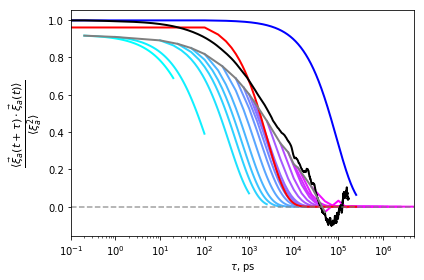

/home/ebeyerle/bin/anaconda3/envs/pyemma_tutorials/lib/python3.6/site-packages/ipykernel/__main__.py:94: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


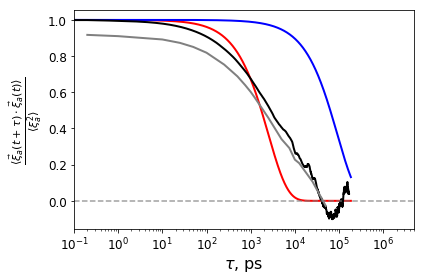

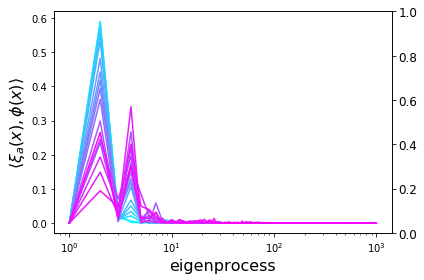

b'Mon Feb 24 10:48:45 PST 2020\n'
1.0
5.0
50.0
125.0
250.0
500.0
1250.0
2500.0
3750.0
5000.0
6250.0
12500.0
25000.0
37500.0
50000.0
62500.0
125000.0
250000.0
8401.540327904679


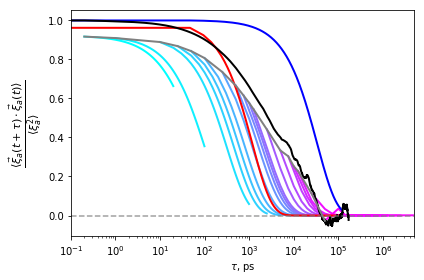

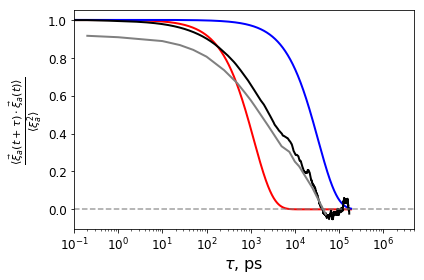

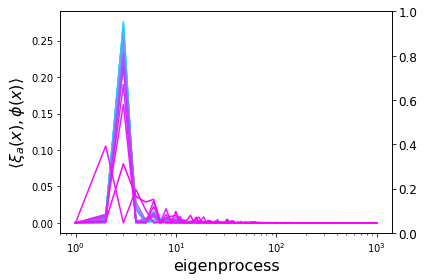

b'Mon Feb 24 10:51:35 PST 2020\n'
1.0
5.0
50.0
125.0
250.0
500.0
1250.0
2500.0
3750.0
5000.0
6250.0
12500.0
25000.0
37500.0
50000.0
62500.0
125000.0
250000.0
6325.230652841305


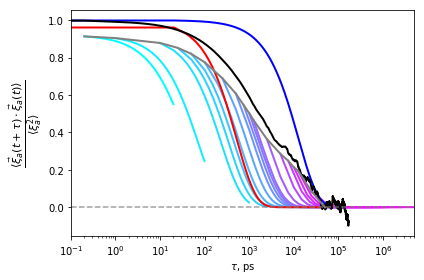

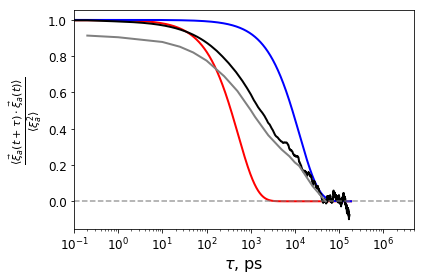

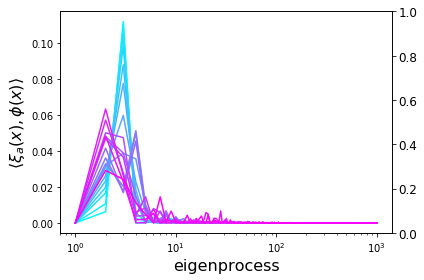

b'Mon Feb 24 10:54:23 PST 2020\n'
1.0
5.0
50.0
125.0
250.0
500.0
1250.0
2500.0
3750.0
5000.0
6250.0
12500.0
25000.0
37500.0
50000.0
62500.0
125000.0
250000.0
3162.004505415149


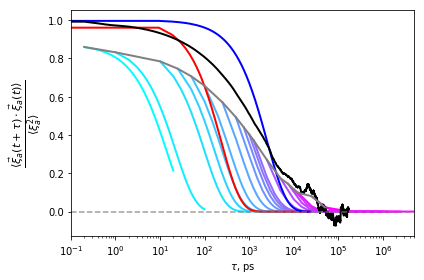

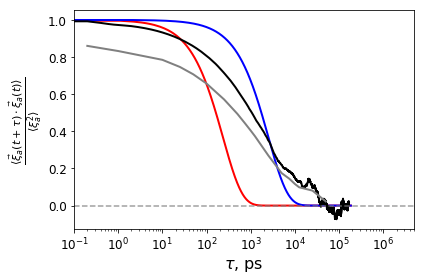

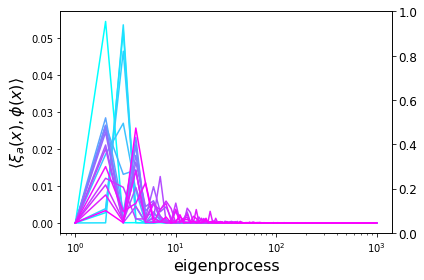

b'Mon Feb 24 10:57:04 PST 2020\n'
1.0
5.0
50.0
125.0
250.0
500.0
1250.0
2500.0
3750.0
5000.0
6250.0
12500.0
25000.0
37500.0
50000.0
62500.0
125000.0
250000.0
5765.370705826023


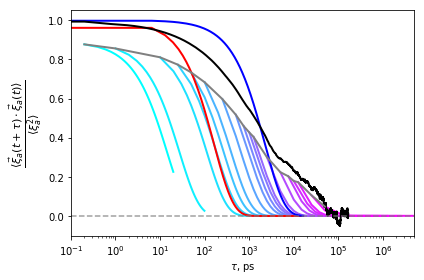

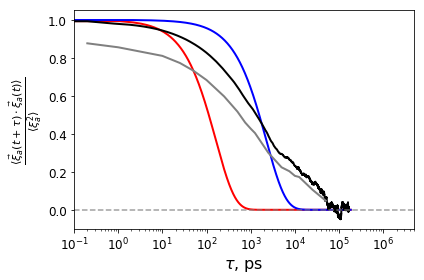

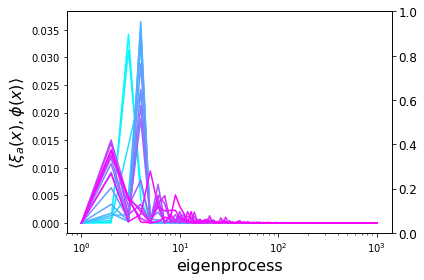

b'Mon Feb 24 10:59:46 PST 2020\n'
1.0
5.0
50.0
125.0
250.0
500.0
1250.0
2500.0
3750.0
5000.0
6250.0
12500.0
25000.0
37500.0
50000.0
62500.0
125000.0
250000.0
5061.683460485253


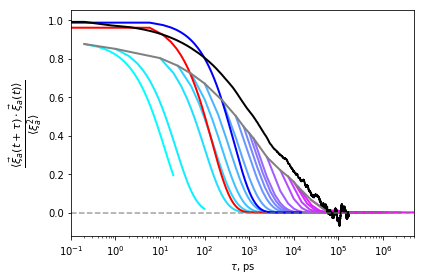

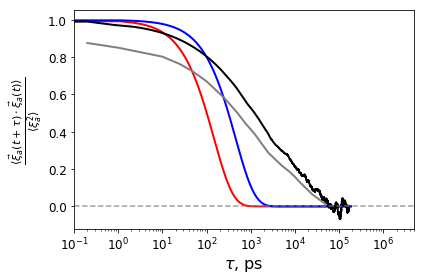

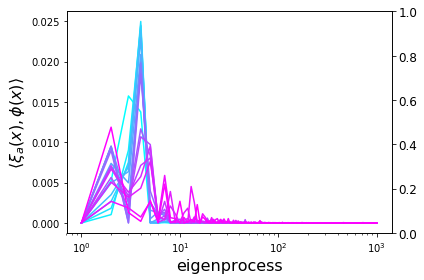

b'Mon Feb 24 11:02:28 PST 2020\n'
1.0
5.0
50.0
125.0
250.0
500.0
1250.0
2500.0
3750.0
5000.0
6250.0
12500.0
25000.0
37500.0
50000.0
62500.0
125000.0
250000.0
21578.62129099845


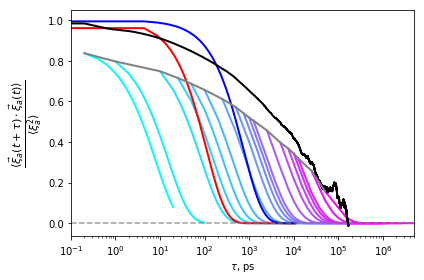

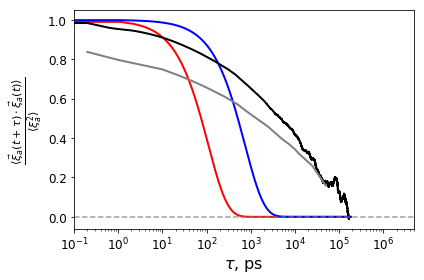

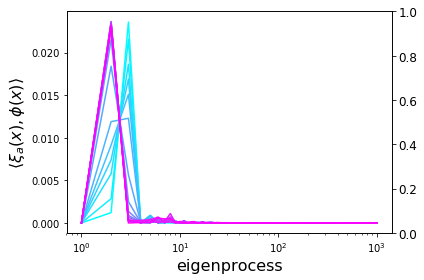

b'Mon Feb 24 11:05:09 PST 2020\n'
1.0
5.0
50.0
125.0
250.0
500.0
1250.0
2500.0
3750.0
5000.0
6250.0
12500.0
25000.0
37500.0
50000.0
62500.0
125000.0
250000.0
1712.2601942435713


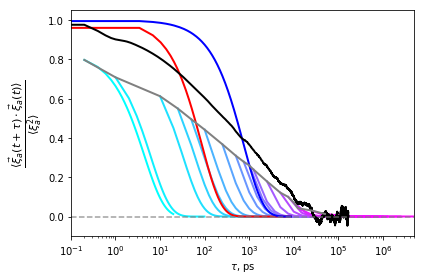

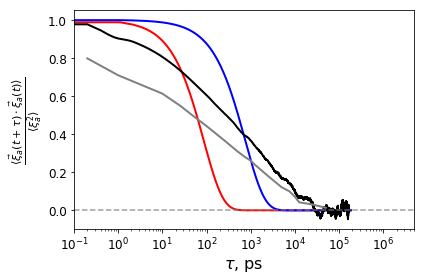

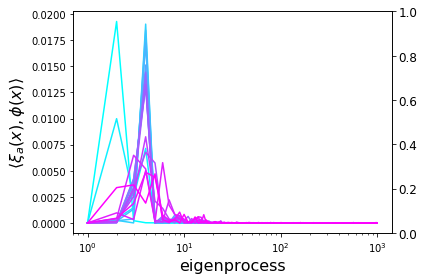

b'Mon Feb 24 11:07:46 PST 2020\n'
1.0
5.0
50.0
125.0
250.0
500.0
1250.0
2500.0
3750.0
5000.0
6250.0
12500.0
25000.0
37500.0
50000.0
62500.0
125000.0
250000.0
4326.805330152808


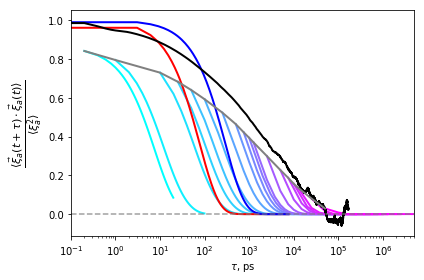

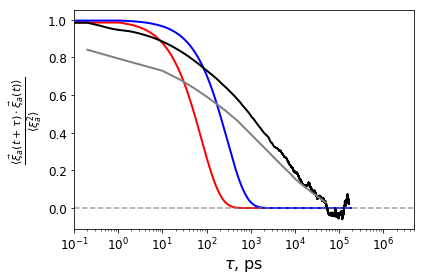

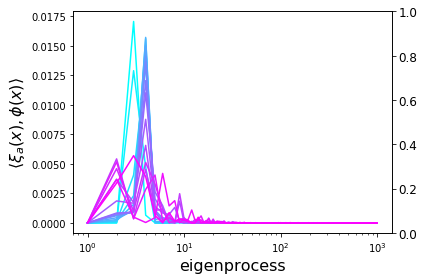

b'Mon Feb 24 11:10:22 PST 2020\n'
1.0
5.0
50.0
125.0
250.0
500.0
1250.0
2500.0
3750.0
5000.0
6250.0
12500.0
25000.0
37500.0
50000.0
62500.0
125000.0
250000.0
3031.9481485966066


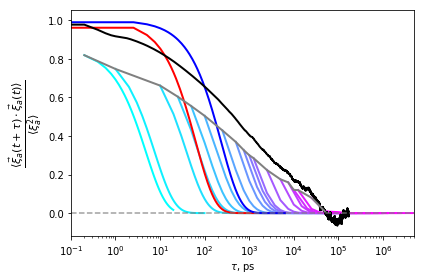

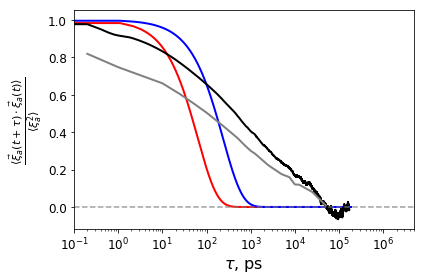

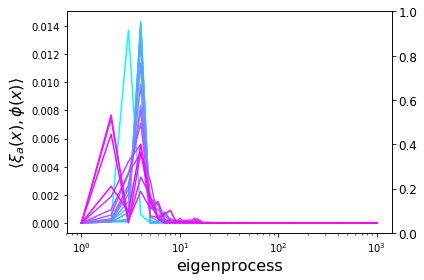

b'Mon Feb 24 11:13:00 PST 2020\n'


In [4]:
#Now check for dot products

print(subprocess.check_output('date',shell=True))
step = 0.2
bigdplist = []
bigtlist = []
bigacflist = []
bigdlist = []
for a in range(1,11):

    dplist = []
    acflist = []
    tlist = []
    acftimelist = []
    
    xi = np.loadtxt('xi_'+str(a)+'_aniso.xvg')[:-1]
    
    dtrajs = np.load('1000microstates/mode'+str(a)+'/dtrajs_kmeans.npy').ravel()
    dtrajs = dtrajs[:-1]
    lags = (1/step)*np.array([step,1,10,25,50,100,250,500,750,1000,1250,2500,5000,7500,10000,12500,25000,50000])
    colors1 = plt.cm.cool(np.linspace(0,1,len(lags)))
    colors2 = plt.cm.autumn(np.linspace(0,1,len(lags)))
    dummy = np.copy(xi)
    
    M = pyemma.msm.estimate_markov_model(dtrajs,lag=1)
    M.pcca(2)
    metastable_traj = M.metastable_assignments[dtrajs] 

    avgxisq = 0

    for k in range(len(xi)):
        avgxisq += np.dot(xi[k,:],xi[k,:])

    avgxisq /= len(xi)
    
    xi_mapped = np.array([xi[dtrajs == i].mean(0) for i in range(1000)])
    
    dlist = []
    for num,lag in enumerate(lags):

        print(lag)
        nbins = 100
        M = pyemma.msm.estimate_markov_model(dtrajs,lag=lag)
        phi = M.eigenvectors_left()

        corr_times,acfx = M.correlation(xi_mapped[:,0],maxtime=100*lag)
        corr_times,acfy = M.correlation(xi_mapped[:,1],maxtime=100*lag)
        corr_times,acfz = M.correlation(xi_mapped[:,2],maxtime=100*lag)
        
        acf = acfx + acfy + acfz
        dlist.append(acf[1]/avgxisq)
        acftimelist.append(step*corr_times[1])
        #if num == 0:
        #    plt.plot(step*corr_times,(acf/avgxisq),lw=2,color=colors1[num])
        #else:
        plt.plot(step*corr_times[1:],(acf/avgxisq)[1:],lw=2,color=colors1[num])

        acflist.append(np.column_stack([step*corr_times,acf/avgxisq]))
        
        
        
        dp = np.zeros(1000)
        for i in range(len(phi)):
            dp[i] = np.dot(xi_mapped.sum(1),phi[i,:])
        dplist.append(dp**2)
        np.savetxt('dp_xi_'+str(a)+'_lag'+str(lag)+'.dat',dp**2)
        tlist.append(step*M.timescales())
       
    np.savetxt('acf_xi_'+str(a)+'_msm.dat',np.column_stack([np.array(acftimelist),np.array(dlist)]))
    #Compare to barrier-free and simulated mode decorrelations
    acf4 = np.loadtxt('mode_corr_'+str(a))
    def efunc(x,b):
        return np.exp(-x/b)
    xaxis = np.linspace(0,100000,100000)
    params,covar_params = scipy.optimize.curve_fit(efunc,step*np.arange(len(acf4[:,0])),acf4[:,1])
    print(params[0])
    
    t = np.linspace(0,100*tau[a-1],2500)
    #plt.plot(xaxis,efunc(xaxis,params[0]),lw=2,color='r')
    plt.plot(t,np.exp(-t/tau[a-1]),lw=2,color='r')
    plt.plot(t,np.exp(-t/tau_scaled[a-1]),lw=2,color='b')
    plt.plot(acf4[:,0],acf4[:,1],lw=2,c='k')
    plt.plot(acftimelist,dlist,lw=2,c='grey')
    plt.axhline(0,lw=1.5,ls='--',alpha=0.75,color='grey')
    plt.ylabel(r'$\frac{\langle\vec{\xi}_a(t+\tau)\cdot\vec{\xi}_a(t)\rangle}{\langle\xi_a^2\rangle}$',fontsize=16)
    plt.xscale('log')
    plt.xlim((0.1,step*100*lag))
    plt.xlabel(r'$\tau$, ps')
    plt.tight_layout()
    #plt.savefig('acf'+str(a)+'.pdf',dpi=300)
    plt.show()
    plt.close()

    t = np.linspace(0,1.1*acf4[-1,0],acf4[-1,0])
    #plt.plot(xaxis,efunc(xaxis,params[0]),lw=2,color='r')
    plt.plot(t,np.exp(-t/tau[a-1]),lw=2,color='r')
    plt.plot(t,np.exp(-t/tau_scaled[a-1]),lw=2,color='b')
    plt.plot(acf4[:,0],acf4[:,1],lw=2,c='k')
    plt.plot(acftimelist,dlist,lw=2,c='grey')
    plt.axhline(0,lw=1.5,ls='--',alpha=0.75,color='grey')
    plt.ylabel(r'$\frac{\langle\vec{\xi}_a(t+\tau)\cdot\vec{\xi}_a(t)\rangle}{\langle\xi_a^2\rangle}$',fontsize=16)
    plt.xscale('log')
    plt.xlim((0.1,step*100*lag))
    plt.xlabel(r'$\tau$, ps',fontsize=16)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.tight_layout()
    plt.savefig('acf'+str(a)+'.pdf',dpi=300)
    plt.show()
    plt.close()
    
    fig, ax1 = plt.subplots()

    color = 'k'
    ax1.set_xlabel('eigenprocess',fontsize=16)
    ax1.set_ylabel(r'$\langle\xi_a(x),\phi(x)\rangle$',color=color,fontsize=16)
    for i in range(len(dplist)):
        ax1.plot(np.arange(1,1001), dplist[i], color=colors1[i])
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xscale('log')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'b'
    #ax2.set_ylabel(r'$t_i$, ps',color=color,fontsize=16) # we already handled the x-label with ax1
    #for i in range(len(tlist)):
    #    ax2.plot(np.arange(2,1001), tlist[i], color=colors2[i])
    #ax2.tick_params(axis='y', labelcolor=color)
    #ax2.set_yscale('log')
    plt.xticks(size=12)
    plt.yticks(size=12)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.savefig('dp_xi_phi_'+str(a)+'.pdf',dpi=300)
    plt.show()
    plt.close()
    
    bigacflist.append(acflist)
    bigdplist.append(dplist)
    bigtlist.append(tlist)
    bigdlist.append(dlist)
    
    print(subprocess.check_output('date',shell=True))

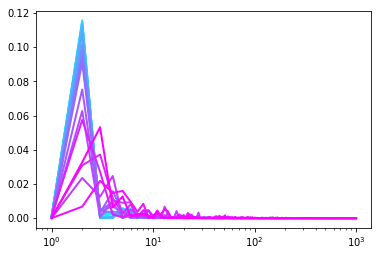

In [31]:
for i in range(len(bigdplist[0])):
    plt.plot(np.arange(1,1001),bigdplist[0][i]**2,lw=2,c=colors1[i])
plt.xscale('log')
plt.show()
plt.close()

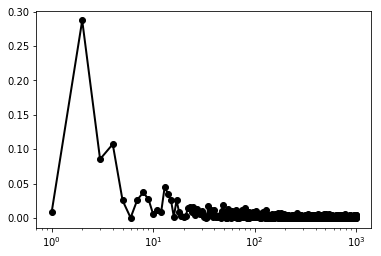

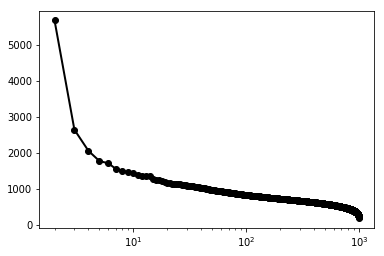

In [23]:
dp = np.zeros(1000)
for i in range(len(phi)):
    dp[i] = np.dot(xi_mapped.sum(1),phi[i,:])
plt.plot(np.arange(1,1001),abs(dp),lw=2,c='k',marker='o')
plt.xscale('log')
plt.show()
plt.close()

plt.plot(np.arange(2,1001),0.2*M.timescales(),lw=2,c='k',marker='o')
plt.xscale('log')
plt.show()
plt.close()